# Multivariate Data Analysis - Assignment 4
#### Name: Kai Ferragallo-Hawkins
#### Date: 15.4.2024

# Setup - Packages and Imports

In [299]:
# Pandas, package for general data analysis
import pandas as pd
# Scipy.stats, used for chi2 test
from scipy.stats import chi2_contingency
# Prince, a package for multivariate data like CA and MCA. Proved to be unreliable?
from prince import CA, MCA
# Matplotlib, for base and adjustable python plotting
import matplotlib.pyplot as plt
# mca, a package for MCA analysis. Ended up being used for the final results
import mca as second_mca_package

# pca_map, made by williamhuybui on GitHub, used for CA and MCA dimensions
from functions.pca_map import pca_map
# Seaborn, for more specific graphs
import seaborn as sns
# Numpy, for mathematical functions
import numpy as np
# Netowrkx, for network relationship graphs
import networkx as nx

# Girls dataframe information
girls_values = [[21, 21, 14, 13, 8], [8, 9, 6, 8, 2], [2, 3, 4, 10, 10]]
girls_columns = ["< 16", "16-17", "17-18", "18-19", "19-20"]
girls_indexes = ["No boyfriend", "Boyfriend: No sex", "Boyfriend: Sex"]

# Importing Findings on Music & Mental Health (2023)
MMH = pd.read_csv("data/mxmh_survey_results.csv")

# Importing Airline Data
airline = pd.read_csv("data/airline.csv")

# Plotting the dimensions of the correspondence analysis
def two_dimension_graph(dataset, analysis_frame): 
    ## Getting coordinates of rows and columns
    row_coordinates = analysis_frame.row_coordinates(dataset)
    column_coordinates = analysis_frame.column_coordinates(dataset)
    
    ## Setting a larger plot
    plt.figure(figsize=(10, 8))
    
    ## Plotting columns and rows
    plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], marker='v', s = 100, color='red', label='Columns')
    plt.scatter(row_coordinates.iloc[:, 0], row_coordinates.iloc[:, 1], marker='o', s = 50, color='blue', label='Rows')
    
    ## Plotting lines for 0-0 axis
    plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line
    plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line
    
    ## Connecting column points with lines
    for i in range(len(column_coordinates) - 1):
        plt.plot([column_coordinates.iloc[i, 0], column_coordinates.iloc[i + 1, 0]],
                 [column_coordinates.iloc[i, 1], column_coordinates.iloc[i + 1, 1]], color='red')
    
    ## Adding labels for columns
    for i, col in enumerate(column_coordinates.index):
        plt.text(column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1], col, ha='left', va='bottom', fontsize=10, color='red')
    
    ## Adding labels for rows
    for i, txt in enumerate(row_coordinates.index):
        plt.text(row_coordinates.iloc[i, 0], row_coordinates.iloc[i, 1], txt, ha='right', va='bottom', fontsize=10, color='blue')
    
    ## Getting variance %
    
    ## Setting limits on axis, a legend, and labels
    plt.xlim(-0.4, 1)
    plt.legend()
    plt.xlabel(f'Dimension 1 - {ca.eigenvalues_summary["% of variance"][0]}')
    plt.ylabel(f'Dimension 2 - {ca.eigenvalues_summary["% of variance"][1]}')
    plt.title('Correspondence Analysis')
    plt.grid(True)
    
    ## Showing plot
    plt.show()


# Exercise 4.1 - Girls Dataset
## 4.1.1 - Chi^2 Test
**Read the MABS text (chapter 14, CA), section 14.3.1 (related to the cover picture
of this week’s lecture slides) and repeat the related x^2 (chi-squared) test, studying it in detail.**

A chi^2 test lets us see if our values hold correlation with one another. The p-value of the girls dataset, p = 0.008, meaning that, assuming the difference in the girls dataset was not related, we'd get the observed difference or more in 0.8% of studies due to random sampling error. The expected values show how it assumes that, as the ages get higher, every row decreases in value, but this is found to be untrue for Boyfriend: Sex. This increasing trend is also shown when looking at the row, column, and overall percentages.

In [6]:
# Setting up girls dataframe
girls = pd.DataFrame(girls_values, index = girls_indexes, columns = girls_columns)
print("Girls dataframe:")
display(girls)

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(girls)

# Printing all called values, alongside formatting p-value, chi-squared, and expected counts with 2f/3f
print("Chi-squared statistic:", "{:.2f}".format(chi2_stat))
print("Degrees of freedom:", dof)
print("P-value:", "{:.3f}".format(p_val))
print("Expected counts under null hypothesis:")
display(pd.DataFrame(expected, index = girls_indexes, columns = girls_columns).map(lambda x: "{:.2f}".format(x)))

# Row percentages (similar to prop.table() in R). Row also get a sum column to affirm that the sum values = 100%
row_percentages = 100 * girls.div(girls.sum(axis=1), axis=0)
row_percentages['Sum'] = row_percentages.sum(axis=1)
print("Row percentages:\n", row_percentages)

# Column percentages
column_percentages = 100 * girls.div(girls.sum(axis=0), axis=1)
print("\nColumn percentages:\n", column_percentages)

# Overall percentages
overall_percentages = 100 * girls / girls.values.sum()
print("\nOverall percentages:\n", overall_percentages)

Girls dataframe:


,< 16,16-17,17-18,18-19,19-20
No boyfriend,21,21,14,13,8
Boyfriend: No sex,8,9,6,8,2
Boyfriend: Sex,2,3,4,10,10


Chi-squared statistic: 20.60
Degrees of freedom: 8
P-value: 0.008
Expected counts under null hypothesis:


,< 16,16-17,17-18,18-19,19-20
No boyfriend,17.17,18.28,13.29,17.17,11.08
Boyfriend: No sex,7.36,7.83,5.70,7.36,4.75
Boyfriend: Sex,6.47,6.88,5.01,6.47,4.17


Row percentages:
                         < 16      16-17      17-18      18-19      19-20  \
No boyfriend       27.272727  27.272727  18.181818  16.883117  10.389610   
Boyfriend: No sex  24.242424  27.272727  18.181818  24.242424   6.060606   
Boyfriend: Sex      6.896552  10.344828  13.793103  34.482759  34.482759   

                     Sum  
No boyfriend       100.0  
Boyfriend: No sex  100.0  
Boyfriend: Sex     100.0  

Column percentages:
                         < 16      16-17      17-18      18-19  19-20
No boyfriend       67.741935  63.636364  58.333333  41.935484   40.0
Boyfriend: No sex  25.806452  27.272727  25.000000  25.806452   10.0
Boyfriend: Sex      6.451613   9.090909  16.666667  32.258065   50.0

Overall percentages:
                         < 16      16-17      17-18     18-19     19-20
No boyfriend       15.107914  15.107914  10.071942  9.352518  5.755396
Boyfriend: No sex   5.755396   6.474820   4.316547  5.755396  1.438849
Boyfriend: Sex      1.438849   2.15

## 4.1.2 - CA Test
**Repeat the related CA and study it in (some) detail, using the R code provided.**
The correspondence analysis created two components, with the 1st explaining 95.4% of the variance, and the 2nd explaining 4.6%. Dimension 1 appears most associated with whether someone has sex (where boyfriend: no sex and no boyfriend about the same, and boyfriend: sex far away). Dimension 2 is a less clear relationship, though also doesn't explain much about the data.

The results appear to match up with the example given, though with the dimensions reversed.

Eigenvalues/Inertias:
           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.141        95.36%                     95.36%
1              0.007         4.64%                    100.00%

Row contributions (%):
                       0     1
No boyfriend       14.6  30.0
Boyfriend: No sex   6.2  70.0
Boyfriend: Sex     79.1   0.0

Column contributions (%):
            0      1
< 16   19.85   9.81
16-17  14.10   0.00
17-18   1.30   0.00
18-19  12.42  58.37
19-20  52.32  31.83


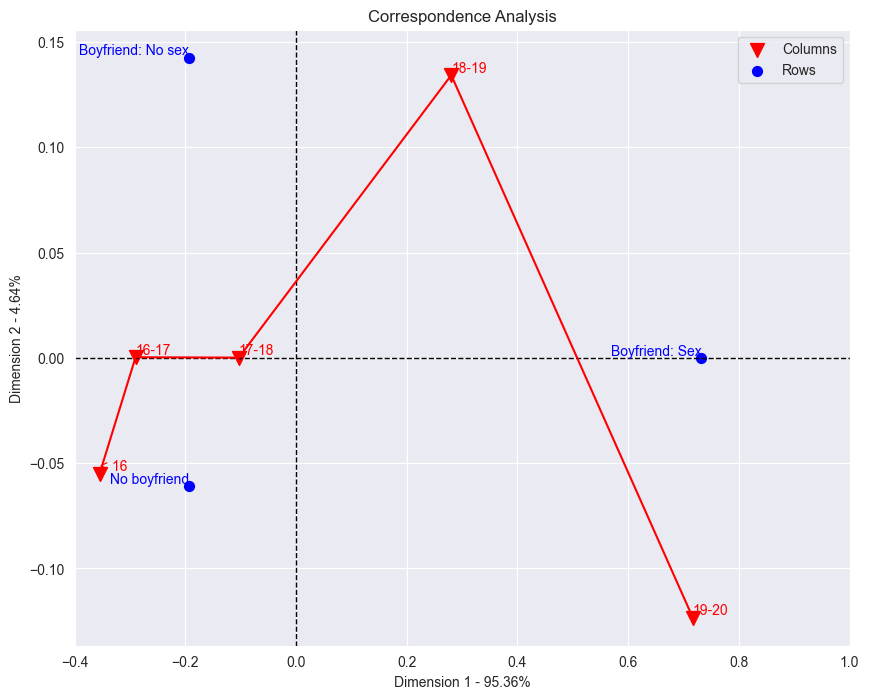

alt.LayerChart(...)

In [141]:
# Correspondence analysis with the prince package, 2 components
ca = CA(n_components=2)
ca.fit(girls)

# Analyzing results
print("Eigenvalues/Inertias:\n", ca.eigenvalues_summary)
print("\nRow contributions (%):\n", ca.row_contributions_.head().map(lambda x: "{:.1f}".format(x*100)))
print("\nColumn contributions (%):\n", ca.column_contributions_.head().map(lambda x: "{:.2f}".format(x*100)))

# Using function
two_dimension_graph(girls, ca)

# An HTML-interactive plot through the prince package. Will not show on the pdf version.
ca.plot(
    girls,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=True,
    show_column_labels=True
)

# Exercise 4.2 - Findings on Music & Mental Health Dataset (and MCA)
I drifted from the original instructions for this assignment (didn't due quite as much focus on graphs) due to the difficulties in getting MCA to work in Python, going from CA analysis to an MCA analysis with the 5 categories used by the example R code. How that process went can be followed throughout the following exercise.

**Again reflect with (some of) the challenges and pitfalls listed in the lecture material.**
It does appear easy, when looking at the MCA data, to deside that there is a casual relationship between variables that are close. While it can be the case, one should not make that determinant with only an MCA analysis. Using it as a baseline to explore further is the best option.

While a variable may also be able to explain a decent amount of the variance (say, 67%), it still does not explain everything. 25% variance missing is still 25% variance missing. The dimensionality reduction helps get more information from less, but it still can't incorporate the whole picture.

## 4.2.1 - Data Wrangling
To begin, I did some data wrangling, where I got all columns which had the frequency values and mapped the new names to them. I then checked to see if there were any NA values missing.

In [248]:
# Data wrangling
## Getting all frequency columns into a single dataframe
MMH_frequency_columns = [col for col in MMH.columns if col.startswith("Frequency")]
MMH_frequency = MMH[MMH_frequency_columns].copy()

## Renaming the columns
column_mapping = {
    "Frequency [Classical]": "Classical",
    "Frequency [Country]": "Country",
    "Frequency [EDM]": "EDM",
    "Frequency [Folk]": "Folk",
    "Frequency [Gospel]": "Gospel",
    "Frequency [Hip hop]": "Hip_hop",
    "Frequency [Jazz]": "Jazz",
    "Frequency [K pop]": "K_pop",
    "Frequency [Latin]": "Latin",
    "Frequency [Lofi]": "Lofi",
    "Frequency [Metal]": "Metal",
    "Frequency [Pop]": "Pop",
    "Frequency [R&B]": "R_B",
    "Frequency [Rap]": "Rap",
    "Frequency [Rock]": "Rock",
    "Frequency [Video game music]": "Video_game"
}

## Using mapping
MMH_frequency = MMH_frequency.rename(columns=column_mapping)

## Checking new dataframe
display(MMH_frequency)

## Checking for NA Values
MMH_frequency_no_na = MMH_frequency.dropna()

### Noting the differences in NA values
print("Differences in NA values for original dataframe:")
print("Number of rows in original DataFrame:", MMH_frequency.shape[0])
print("Number of rows after dropping NA values:", MMH_frequency_no_na.shape[0])

## Getting V1 dataframe with two frequency values (CA)
MMH_frequency_V1 = MMH_frequency[["Video_game", "Rock"]].copy()

## Getting V2 dataframe with three frequency values (MCA)
MMH_frequency_V2 = MMH_frequency[["Video_game", "Rock", 'Pop']].copy()

## Getting test dataframe with four frequency values (MCA) - copy from worksheet given
MMH_frequency_test = MMH_frequency[["Classical", "Country", "EDM", "Folk", "Gospel"]].copy()

,Classical,Country,EDM,Folk,Gospel,Hip_hop,Jazz,K_pop,Latin,Lofi,Metal,Pop,R_B,Rap,Rock,Video_game
0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes
1,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely
2,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently
3,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never
4,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never
732,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes
733,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely
734,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes


Differences in NA values for original dataframe:
Number of rows in original DataFrame: 736
Number of rows after dropping NA values: 736


## 4.2.2 - CA Attempt
The prince package, from my testing, does not accept categorical values into CA, and only lets CA work if it's already transformed. I therefore changed my data to be aggregates of the instances of the categories (i.e. number of times Video_game was "Never") and then plugged it into the CA analysis. This ended up producing only one eigenvalue/dimension, which was an interesting diversion from the example, which did manage to produce three eigenvalues. It is hard to know at a glance if the process, or my own wrangling, is the reason for the difference. The lack of contribution from Sometimes makes sense, if only due to its closeness between the categories. Later attempts suggest that there may be something with the process, however, that makes it different then the R code...

In [249]:
# Adjusting dataframe to one that should work for CA
## Grabbing unique values
video_game_categories = MMH_frequency_V1['Video_game'].unique()
rock_categories = MMH_frequency_V1['Rock'].unique()

## Getting aggregate values
video_game_data = MMH_frequency_V1.groupby(['Video_game']).size().reset_index(name='VG_Count')
rock_data = MMH_frequency_V1.groupby(['Rock']).size().reset_index(name='R_Count')
MMH_frequency_V1 = pd.concat([video_game_data, rock_data], axis=1)

## Adjusting dataframe
MMH_frequency_V1.drop("Rock", axis=1, inplace=True)
MMH_frequency_V1.columns = ['index', "Video_game", "Rock"]
MMH_frequency_V1.set_index('index', inplace=True)

## Displaying dataframe
display(MMH_frequency_V1)

# CA analysis with 3 components
ca = CA(n_components=3)
ca.fit(MMH_frequency_V1)

# Analyzing CA results
print("Eigenvalues/Inertias:\n", ca.eigenvalues_summary)
print("\nRow contributions (%):\n", ca.row_contributions_.head().map(lambda x: "{:.1f}".format(x*100)))
print("\nColumn contributions (%):\n", ca.column_contributions_.head().map(lambda x: "{:.2f}".format(x*100)))

,Video_game,Rock
index,,
Never,236,91
Rarely,197,96
Sometimes,186,219
Very frequently,117,330


Eigenvalues/Inertias:
           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.138       100.00%                    100.00%

Row contributions (%):
                     0
Never            31.6
Rarely           17.1
Sometimes         1.3
Very frequently  49.9

Column contributions (%):
                 0
Video_game  50.00
Rock        50.00


## 4.2.3 - MCA Attempt #1
Here, I tried to do an MCA analysis with the same five columns given in the example (Classical to Gospel). The results proved very different from the example. Notably, the eigenvalue decrease was much less pronounced between the different components, resulting in each following dimension only being slightly weaker than the previous. Even if this is a correct use of MCA, it does not appear particularly useful - if the reason for using this is dimensionality reduction, where we can use fewer variables to explain the data, having two variables explain less than 20% of the variance does not provide much insight. I decided to keep exploring to see if I could get the results to be the same.

Eigenvalues/Inertias:
           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.346        11.53%                     11.53%
1              0.252         8.40%                     19.93%
2              0.240         8.01%                     27.94%
3              0.228         7.59%                     35.53%
4              0.220         7.34%                     42.87%
5              0.210         7.01%                     49.88%
6              0.206         6.87%                     56.75%

Column contributions (%):
                                0      1      2      3      4      5      6
Classical_Never            10.13   3.73   0.23   2.67   1.14   1.18  19.84
Classical_Rarely            0.52   1.56  11.98   0.89  12.46   4.80   5.50
Classical_Sometimes         4.86   2.20   2.03   0.71   5.56  16.13   1.81
Classical_Very frequently   0.02   2.36  16.13   5.54   0.85  11.80  14.19
Country_Never   

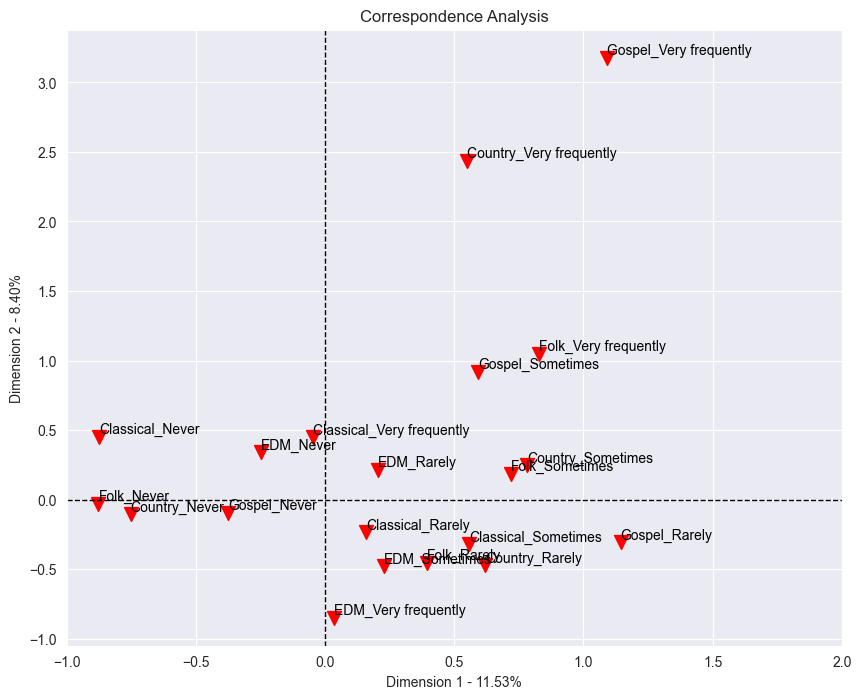

In [195]:
# Multiple correspondence analysis with the prince package, 7 components (matching the example)
mca = MCA(n_components=7)
mca.fit(MMH_frequency_test)

# Analyzing results
print("Eigenvalues/Inertias:\n", mca.eigenvalues_summary)
print("\nColumn contributions (%):\n", mca.column_contributions_.map(lambda x: "{:.2f}".format(x*100)))

# Graphing the MCA analysis
## Getting coordinates of rows and columns
row_coordinates = mca.row_coordinates(MMH_frequency_test)
column_coordinates = mca.column_coordinates(MMH_frequency_test)

## Setting a larger plot
plt.figure(figsize=(10, 8))

## Plotting columns and rows
plt.scatter(column_coordinates.iloc[:, 0], column_coordinates.iloc[:, 1], marker='v', s = 100, color='red', label='Columns')

## Plotting lines for 0-0 axis
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line

## Adding labels for columns
for i, col in enumerate(column_coordinates.index):
    plt.text(column_coordinates.iloc[i, 0], column_coordinates.iloc[i, 1], col, ha='left', va='bottom', fontsize=10, color='black')

## Setting limits on axis, a legend, and labels
plt.xlim(-1, 2)
plt.xlabel(f'Dimension 1 - {mca.eigenvalues_summary["% of variance"][0]}')
plt.ylabel(f'Dimension 2 - {mca.eigenvalues_summary["% of variance"][1]}')
plt.title('Multiple Correspondence Analysis - MMA, Attempt 1')
plt.grid(True)

## Showing plot
plt.show()

## 4.2.4 - MCA Attempt #2
After some diving, I found that the MCA is using one-hot encoding to convert the categorical variables, or an indicator matrix, and that pandas get dummies can do this as well. I tried to see if turning it off would impact the results, to no avail.

In [251]:
# Multiple correspondence analysis with the prince package, 7 components (matching the example)
MMH_frequency_test_dummies = pd.get_dummies(MMH_frequency_test)
mca = MCA(n_components=7, one_hot=False)
mca.fit(MMH_frequency_test_dummies)

# Analyzing results
print("Eigenvalues/Inertias:\n", mca.eigenvalues_summary)

Eigenvalues/Inertias:
           eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.346        11.53%                     11.53%
1              0.252         8.40%                     19.93%
2              0.240         8.01%                     27.94%
3              0.228         7.59%                     35.53%
4              0.220         7.34%                     42.87%
5              0.210         7.01%                     49.88%
6              0.206         6.87%                     56.75%


## 4.2.5 - MCA Attempt #3
I then found a third package: mca (https://pypi.org/project/mca/), whose system not quite as easy to use, but I tried my hand at seeing if the first two eigenvalues would prove to be the same. In a nice sign, they did prove to be the same.

In [282]:
# Getting the MCA values from the second MCA package.
second_mca = second_mca_package.MCA(MMH_frequency_test_dummies, ncols=5)

# Getting the eigenvalues
data = np.array([second_mca.L[:6], second_mca.expl_var(greenacre=True, N=6) * 100]).T
second_mca_eigenvalues = pd.DataFrame(data=data, columns=['Eigenvalues','% of variance'], index=range(1,7))
display(second_mca_eigenvalues)

,Eigenvalues,% of variance
1,0.033265,61.230290
2,0.004211,7.751283
3,0.002535,4.666415
4,0.001201,2.211053
5,0.000635,1.169271
6,0.000170,0.312659


## 4.2.6 - MCA Attempt #3 Tables
I then made a table to show the factor scores and the contributions of the different values from the mca analysis, alongside some additional dataframes to be used when graphing.

In [298]:
# Stealing the column renaming form the prince package :) and making a table on the 1st two factors about factor information, squared cosines, and contributions * 100
# Modified from the mca documentation example. Getting a two factor score table to use for a graph.
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 100'
adjusted_columns = mca.column_coordinates(MMH_frequency_test_dummies).index
second_mca_info = pd.DataFrame(columns=adjusted_columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
second_mca_info.loc[fs,  :] = second_mca.fs_c(N=2).T
second_mca_info.loc[cos, :] = second_mca.cos_c(N=2).T
second_mca_info.loc[cont,:] = second_mca.cont_c(N=2).T * 100
print("Factor score, Squared cosine, and Contribution % information")
display(second_mca_info)

# For all rows - Graph #1
second_mca_two_factor = pd.DataFrame(columns=MMH_frequency_test_dummies.index, index=pd.MultiIndex
                      .from_product([[fs], range(1, 3)]))
second_mca_two_factor.loc[fs,    :] = second_mca.fs_r(N=2).T
second_mca_two_factor = second_mca_two_factor.T # Transposes so the factors are columns

# For all columns and categories - Graph #2
second_mca_two_factor_columns = pd.DataFrame(columns=adjusted_columns, index=pd.MultiIndex
                      .from_product([[fs], range(1, 3)]))
second_mca_two_factor_columns.loc[fs,  :] = second_mca.fs_c(N=2).T
second_mca_two_factor_columns = second_mca_two_factor_columns.T


Factor score, Squared cosine, and Contribution % information


Classical_Never Classical_Rarely Classical_Sometimes  \
Factor score        1       -0.270839         0.049684            0.172514   
                    2        -0.05849         0.030534            0.041279   
Squared cosines     1        0.942862         0.271039            0.882521   
                    2        0.043974         0.102368            0.050528   
Contributions x 100 1       10.126912         0.522269            4.862342   
                    2          3.7309         1.558192            2.199121   

                      Classical_Very frequently Country_Never Country_Rarely  \
Factor score        1                 -0.014806     -0.233334       0.192324   
                    2                 -0.058141      0.013818       0.061189   
Squared cosines     1                  0.010606      0.996118       0.841037   
                    2                  0.163555      0.003494       0.085133   
Contributions x 100 1                   0.01934      15.25513       7.040296   
                    2                   2.35584      0.422641       5.629475   

                      Country_Sometimes Country_Very frequently EDM_Never  \
Factor score        1          0.242172                0.170222 -0.076553   
                    2         -0.032032               -0.315129  -0.04376   
Squared cosines     1          0.767751                0.201457  0.513872   
                    2          0.013432                0.690439  0.167916   
Contributions x 100 1          5.317846                1.159829   1.46971   
                    2          0.734941               31.400087   3.79368   

                      EDM_Rarely EDM_Sometimes EDM_Very frequently Folk_Never  \
Factor score        1   0.062946      0.070591            0.011057  -0.272113   
                    2  -0.027827      0.061997            0.109903   0.003869   
Squared cosines     1    0.45643      0.217952            0.005697    0.99826   
                    2   0.089203      0.168116            0.562846   0.000202   
Contributions x 100 1    0.62792      0.594316            0.008888    17.6623   
                    2   0.969396      3.621233             6.93691   0.028204   

                      Folk_Rarely Folk_Sometimes Folk_Very frequently  \
Factor score        1    0.122261       0.223207             0.257338   
                    2    0.058608      -0.024101            -0.135736   
Squared cosines     1    0.666901       0.867141               0.7385   
                    2     0.15325        0.01011             0.205463   
Contributions x 100 1    2.698559        5.90131             4.219586   
                    2    4.898512        0.54349             9.273566   

                      Gospel_Never Gospel_Rarely Gospel_Sometimes  \
Factor score        1    -0.116209      0.354596         0.184027   
                    2     0.012277      0.039795        -0.118996   
Squared cosines     1     0.960897      0.955425         0.518554   
                    2     0.010724      0.012033         0.216818   
Contributions x 100 1     5.901955     13.866522         1.438568   
                    2     0.520319      1.379561          4.75144   

                      Gospel_Very frequently  
Factor score        1                0.33798  
                    2              -0.410891  
Squared cosines     1               0.350199  
                    2               0.517591  
Contributions x 100 1               1.306401  
                    2              15.252491

## 4.2.7 - MCA Attempt #3 Graphs
The two graphs below each show a different vision of the MCA results. The first displays by row, which shows how there is a relatively even distribution of information across dimension 1, but that dimension 2 has some strays farther down. From Graph #2, it would appear that these values are most affected very_frequently values of gospel and country - and notably, the three lowest values for dimension 1 are all very_frequently (gospel, country, folk). It would also appear that dimension 1 follows alongside those who are and those who aren't music listeners, with 5/6 of the positive dimension 1 columns being the 5 never listened categories, and the only other one being listening to classical music very frequently (likely, then, that classical music listeners are much more likely to not listen to any other forms of music?).

This would make some sense when looking back at the contributions of each column, with the five nevers explaining 50% of dimension 1. classical very_frequently explains ~0% (0.02%). This could mean that the previous analysis is incorrect, or that it more is describe then describes the dimension.

Dimension 2 is explained 54% by gospel very_frequently, country very_frequently, and folk very_frequently, which aligns with the previous thought about those very frequents affecting Dimension 2.

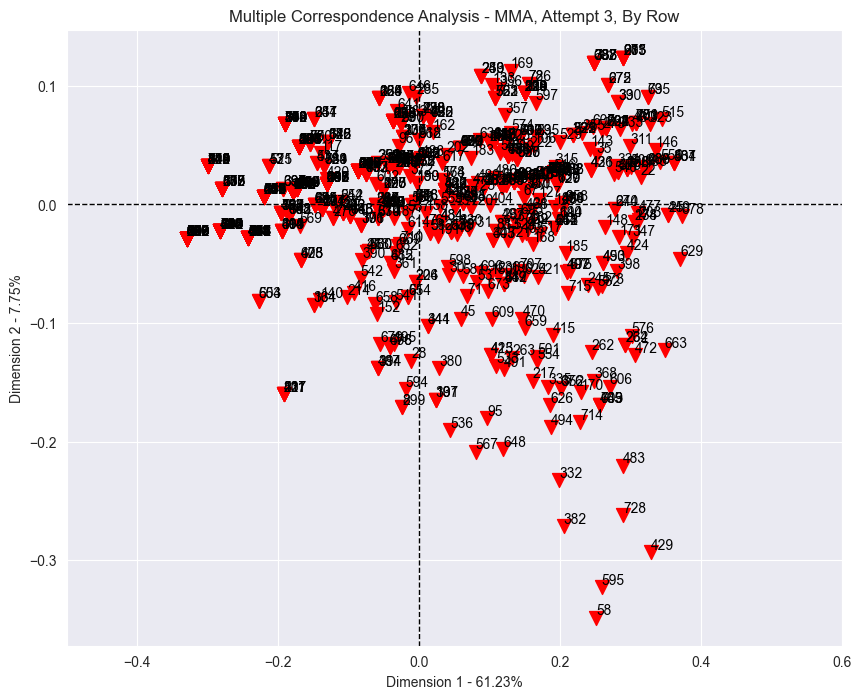

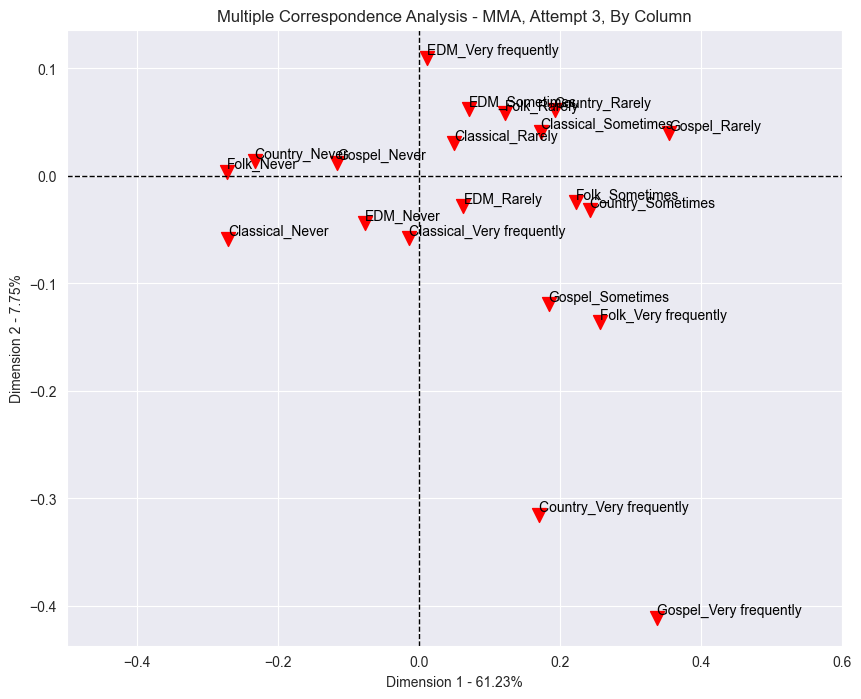

In [295]:
# Graphing the MCA analysis - Graph #1, all rows
## Getting coordinates of rows and columns

## Setting a larger plot
plt.figure(figsize=(10, 8))

## Plotting columns and rows
plt.scatter(second_mca_two_factor.iloc[:, 0], second_mca_two_factor.iloc[:, 1], marker='v', s = 100, color='red', label='Columns')

## Plotting lines for 0-0 axis
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line

## Adding labels for columns
for i, col in enumerate(second_mca_two_factor.index):
    plt.text(second_mca_two_factor.iloc[i, 0], second_mca_two_factor.iloc[i, 1], col, ha='left', va='bottom', fontsize=10, color='black')

## Setting limits on axis, a legend, and labels
plt.xlim(-0.5, 0.6)
plt.xlabel(f'Dimension 1 - {"{:.2f}".format(second_mca_eigenvalues["% of variance"][1])}%')
plt.ylabel(f'Dimension 2 - {"{:.2f}".format(second_mca_eigenvalues["% of variance"][2])}%')
plt.title('Multiple Correspondence Analysis - MMA, Attempt 3, By Row')
plt.grid(True)

## Showing plot
plt.show()

# Graphing the MCA analysis - Graph #2, all columns and categories
## Setting a larger plot
plt.figure(figsize=(10, 8))

## Plotting columns and rows
plt.scatter(second_mca_two_factor_columns.iloc[:, 0], second_mca_two_factor_columns.iloc[:, 1], marker='v', s = 100, color='red', label='Columns')

## Plotting lines for 0-0 axis
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line

## Adding labels for columns
for i, col in enumerate(second_mca_two_factor_columns.index):
    plt.text(second_mca_two_factor_columns.iloc[i, 0], second_mca_two_factor_columns.iloc[i, 1], col, ha='left', va='bottom', fontsize=10, color='black')

## Setting limits on axis, a legend, and labels
plt.xlim(-0.5, 0.6)
plt.xlabel(f'Dimension 1 - {"{:.2f}".format(second_mca_eigenvalues["% of variance"][1])}%')
plt.ylabel(f'Dimension 2 - {"{:.2f}".format(second_mca_eigenvalues["% of variance"][2])}%')
plt.title('Multiple Correspondence Analysis - MMA, Attempt 3, By Column')
plt.grid(True)

## Showing plot
plt.show()

# Exercise 4.3 - Findings on Airplane with MCA
Here, I decided to do the MCA analysis on the airplane dataframe, except with the categorical variables instead of the continuous variables, to see if there is any additional information that could be gleamed.

## 4.3.1 - Data Wrangling
To begin, I selected all the string/categorical values from the airplane dataframe, and then grabbed their dummy values. I did have to return to this section - after attempting to do the MCA analysis, I came upon a memory issue, where there was simply too much information to calculate through the mca package. I therefore reduced the information to 10% through random selection.

In [316]:
# Getting all categorical airplane values
airline_string = airline[airline.select_dtypes(include=["object"]).columns]
print("All airplane categorical values")
display(airline_string)

# Getting dummy values
airline_string_dummies = pd.get_dummies(airline_string)

# Getting random amount of information (10%) from the dummies to reduce it enough for memory allocation to not be a problem
airline_string_dummies_reduced = airline_string_dummies.sample(frac=0.10, replace=False, random_state=42)
airline_string_dummies_reduced.reset_index(drop=True, inplace=True) # Resetting index
print("Reduced dataframe, dummy values")
display(airline_string_dummies_reduced)

# Getting the MCA values from the second MCA package.
second_mca = second_mca_package.MCA(airline_string_dummies_reduced, ncols=5)

All airplane categorical values


,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
129876,Male,Loyal Customer,Business travel,Business,satisfied
129877,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
129878,Male,Loyal Customer,Business travel,Business,satisfied


Reduced dataframe, dummy values


,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,False,True,True,False,False,True,False,True,False,True,False
1,True,False,True,False,True,False,True,False,False,False,True
2,True,False,True,False,True,False,False,True,False,True,False
3,True,False,True,False,False,True,False,True,False,True,False
4,False,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
12983,True,False,True,False,True,False,True,False,False,True,False
12984,False,True,True,False,True,False,True,False,False,False,True
12985,False,True,True,False,True,False,True,False,False,True,False
12986,False,True,False,True,True,False,True,False,False,False,True


## 4.3.2 - Tables/Eigenvalues
Utilizing code from my 4.2, I found the eigenvalues and contributions of each column to the factors. The % of variance explained by the 1st dimension is 69% - slightly higher then what was found in MMH - and 3% for the second.

When looking at the contribution, customer loyalty (56.9% for the disloyal, 12.4% for the loyal) and those who serve in eco plus (7.1%) explain much more of dimension 2 then dimension 1. This might suggest that disloyalty is more aligned with those that serve in cheaper flights? (counteracted below)

In [328]:
# Getting the eigenvalues
data = np.array([second_mca.L[:2], second_mca.expl_var(greenacre=True, N=2) * 100]).T
second_mca_eigenvalues = pd.DataFrame(data=data, columns=['Eigenvalues','% of variance'], index=range(1,3))
display(second_mca_eigenvalues)

# Copied and adjusted from 4.2
## Stealing the column renaming form the prince package :) and making a table on the 1st two factors about factor information, squared cosines, and contributions * 100
## Modified from the mca documentation example. Getting a two factor score table to use for a graph.
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 100'
adjusted_columns = mca.column_coordinates(airline_string_dummies).index
second_mca_info = pd.DataFrame(columns=adjusted_columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
second_mca_info.loc[fs,  :] = second_mca.fs_c(N=2).T
second_mca_info.loc[cos, :] = second_mca.cos_c(N=2).T
second_mca_info.loc[cont,:] = second_mca.cont_c(N=2).T * 100
print("Factor score, Squared cosine, and Contribution % information")
display(second_mca_info)

## For all columns and categories graph
second_mca_two_factor_columns = pd.DataFrame(columns=adjusted_columns, index=pd.MultiIndex
                      .from_product([[fs], range(1, 3)]))
second_mca_two_factor_columns.loc[fs,  :] = second_mca.fs_c(N=2).T
second_mca_two_factor_columns = second_mca_two_factor_columns.T


,Eigenvalues,% of variance
1,0.063196,69.212607
2,0.003508,3.841983


Factor score, Squared cosine, and Contribution % information


Gender_Female Gender_Male Customer Type_Loyal Customer  \
Factor score        1     -0.004331    0.004449                     0.000273   
                    2     -0.018178    0.018672                      0.05144   
Squared cosines     1      0.053721    0.053721                     0.000028   
                    2      0.946279    0.946279                     0.999972   
Contributions x 100 1      0.003008     0.00309                     0.000019   
                    2      0.954601    0.980526                    12.388691   

                      Customer Type_disloyal Customer  \
Factor score        1                       -0.001254   
                    2                       -0.236286   
Squared cosines     1                        0.000028   
                    2                        0.999972   
Contributions x 100 1                        0.000089   
                    2                        56.90688   

                      Type of Travel_Business travel  \
Factor score        1                       0.215375   
                    2                      -0.030333   
Squared cosines     1                       0.980551   
                    2                       0.019449   
Contributions x 100 1                      10.208714   
                    2                       3.647869   

                      Type of Travel_Personal Travel Class_Business  \
Factor score        1                      -0.491726       0.343756   
                    2                       0.069254       0.009584   
Squared cosines     1                       0.980551       0.999223   
                    2                       0.019449       0.000777   
Contributions x 100 1                      23.307661      18.240762   
                    2                       8.328503       0.255435   

                       Class_Eco Class_Eco Plus  \
Factor score        1  -0.338654      -0.258299   
                    2   -0.03214        0.13109   
Squared cosines     1   0.991074       0.795183   
                    2   0.008926       0.204817   
Contributions x 100 1  15.970757       1.524907   
                    2   2.591352       7.075725   

                      satisfaction_neutral or dissatisfied  \
Factor score        1                            -0.273865   
                    2                            -0.030504   
Squared cosines     1                             0.987746   
                    2                             0.012254   
Contributions x 100 1                            13.394154   
                    2                             2.993509   

                      satisfaction_satisfied  
Factor score        1               0.354684  
                    2               0.039506  
Squared cosines     1               0.987746  
                    2               0.012254  
Contributions x 100 1              17.346837  
                    2               3.876909

## 4.3.3 - Graphs
Unlike our view at the tables, we can see in the graph that eco plus is actually opposite of disloyal customer, and is more aligned with loyal customers from flights. Those who fly for business or in business are also seemingly more likely to be satisfied then those who fly for personal reasons or in econ classes. Gender's impact is very small, though has some minor alignment with dimension 2.

When relating to what was done in assignment 3, the alignment of business class and satisfaction does align with the relationship that its active service and comfort, over convince, that defined satisfaction (booking convenience is more similar across type of booking, and other convenience factors are more due to the airport than the flight class).

This is, of course, a casual view of potentially casual relationships, however, and should not be taken at face value. These are leads to be explored rather then definite statements on what should be done for airlines.

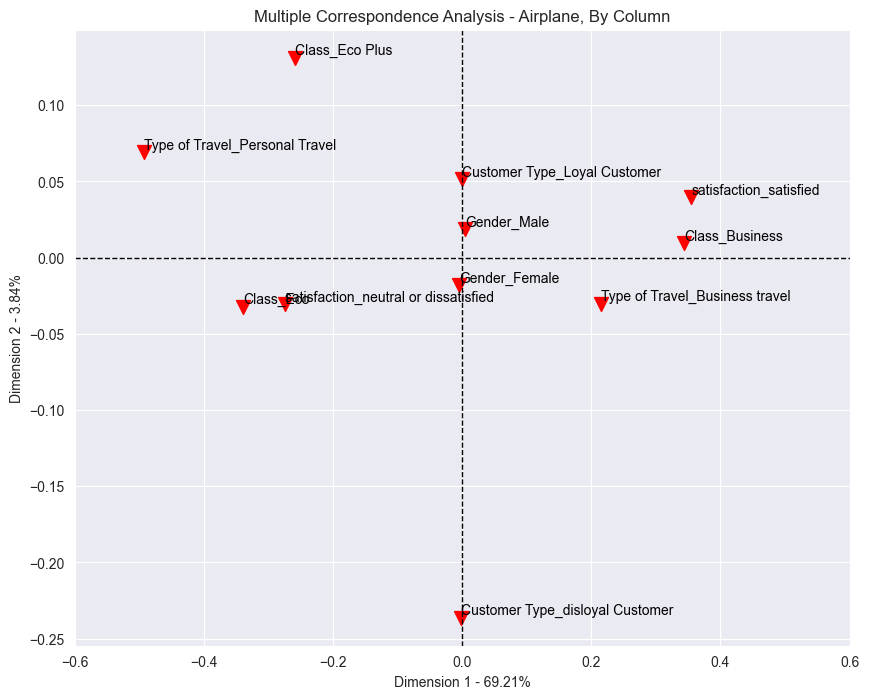

In [332]:
# Graphing the MCA analysis for all columns and categories
## Setting a larger plot
plt.figure(figsize=(10, 8))

## Plotting columns and rows
plt.scatter(second_mca_two_factor_columns.iloc[:, 0], second_mca_two_factor_columns.iloc[:, 1], marker='v', s = 100, color='red', label='Columns')

## Plotting lines for 0-0 axis
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line

## Adding labels for columns
for i, col in enumerate(second_mca_two_factor_columns.index):
    plt.text(second_mca_two_factor_columns.iloc[i, 0], second_mca_two_factor_columns.iloc[i, 1], col, ha='left', va='bottom', fontsize=10, color='black')

## Setting limits on axis, a legend, and labels
plt.xlim(-0.6, 0.6)
plt.xlabel(f'Dimension 1 - {"{:.2f}".format(second_mca_eigenvalues["% of variance"][1])}%')
plt.ylabel(f'Dimension 2 - {"{:.2f}".format(second_mca_eigenvalues["% of variance"][2])}%')
plt.title('Multiple Correspondence Analysis - Airplane, By Column')
plt.grid(True)

## Showing plot
plt.show()